In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from pandas_datareader.data import DataReader


In [24]:
def plot(prediction,target,grey=None,start=None,end=None):
    # if start is None:
    #     start=df.index.min()
    # if end is None:
    #     end=df.index.max()
    # recessions=DataReader('USREC', 'fred', start=start,end=end)['USREC']

    # pd.concat([,target],axis=1,ignore_index=False).plot()
    fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
    
    # if isinstance(df,pd.DataFrame):
    # else:
    #     ylim = (df.min(),df.max())
        

    Results=pd.DataFrame(prediction,index=target.index)
    Results.plot(ax=ax,legend=True)
    Results['target']=target
    ylim = (Results.min().min(),Results.max().max())
    ax.fill_between(Results['target'].index, 0, ylim[1]+1e-2, Results['target'],facecolor='k', alpha=0.1)
    ax.legend(["Prediction", "NBER recession indicator"])
    return fig,ax

In [25]:
# df=yf.download("GE")
# df.head()
n_lookback=30
n_forecast=1

df=pd.read_csv('Data/HistoricalVariables.csv',index_col=0,parse_dates=True)
recessions =  DataReader('USREC', 'fred', start='1800')
df[f'in a recession']=recessions
df['target'] = recessions.shift(-12)

df.fillna(method='ffill',inplace=True)
# df=df.fillna(-1)
df=df['1999':] #.resample('M').last()
print(df.shape)
df.head()

(7678, 126)


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPL,RSXFS,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,UMCSENT,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,S&P: indust,S&P div yield,S&P PE ratio,in a recession,target
1999-01-01,10373.294,9034.3,72.802,1062461.0,223997.0,87.2277,96.3796,94.0471,100.7284,92.6884,...,103.9,4027.1,113575.77,377337.01,1098.6496,227.929993,1.36,32.92,0.0,0.0
1999-01-02,10373.294,9034.3,72.802,1062461.0,223997.0,87.2277,96.3796,94.0471,100.7284,92.6884,...,103.9,4027.1,113575.77,377337.01,1098.6496,227.929993,1.36,32.92,0.0,0.0
1999-01-04,10373.294,9034.3,72.802,1062461.0,223997.0,87.2277,96.3796,94.0471,100.7284,92.6884,...,103.9,4027.1,113575.77,377337.01,1098.6496,226.570007,1.36,32.92,0.0,0.0
1999-01-05,10373.294,9034.3,72.802,1062461.0,223997.0,87.2277,96.3796,94.0471,100.7284,92.6884,...,103.9,4027.1,113575.77,377337.01,1098.6496,230.449997,1.36,32.92,0.0,0.0
1999-01-06,10373.294,9034.3,72.802,1062461.0,223997.0,87.2277,96.3796,94.0471,100.7284,92.6884,...,103.9,4027.1,113575.77,377337.01,1098.6496,235.779999,1.36,32.92,0.0,0.0


In [26]:
df.fillna(0,inplace=True)

In [27]:
test_split=round(len(df)*0.20)
df_for_training=df[:"2004"]
df_for_testing=df["2004":]
print('df_for_training shape: ',df_for_training.shape)
print('df_for_testing shape: ',df_for_testing.shape)

df_for_training shape:  (1900, 126)
df_for_testing shape:  (6096, 126)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training.fillna(0))
# df_for_training_scaled[np.isnan(df_for_training_scaled)] = -1
df_for_testing_scaled=scaler.transform(df_for_testing.fillna(0))
# df_for_testing_scaled[np.isnan(df_for_testing_scaled)] = -1



In [30]:

X_train = df_for_training_scaled[:,:-1]
y_train = df_for_training_scaled[:,-1]

X_test = df_for_testing_scaled[:,:-1]
y_test = df_for_testing_scaled[:,-1]



In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
prediction=model.predict(df[df.columns[:-1]])

c:\Users\admin\Documents\GitHub\projet-de-fin-d-annee\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
model.coef_.shape

(125,)

In [34]:
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (testing): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 1.000
Accuracy score (testing): -47028.442


<Axes: >

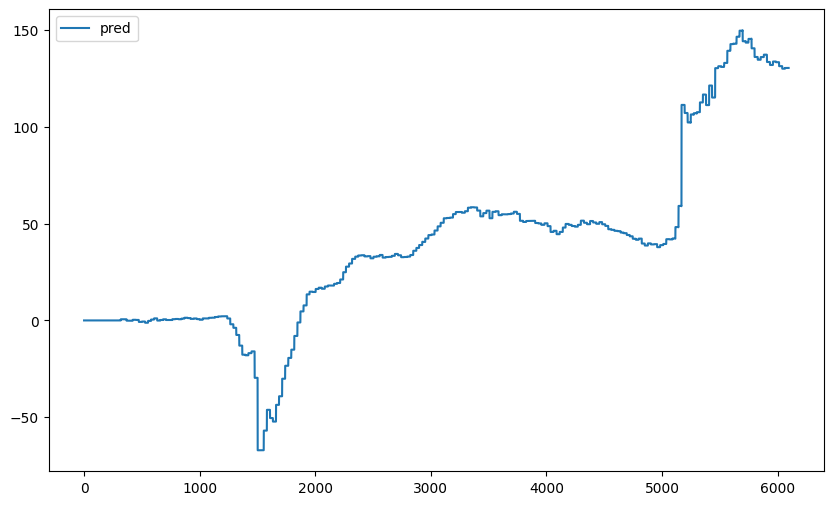

In [35]:
results=pd.DataFrame()
prediction=model.predict(X_test)
results['pred']=prediction
results.plot(figsize=(10,6))


In [38]:
prediction.shape


(7678,)

(<Figure size 3000x900 with 1 Axes>, <Axes: >)

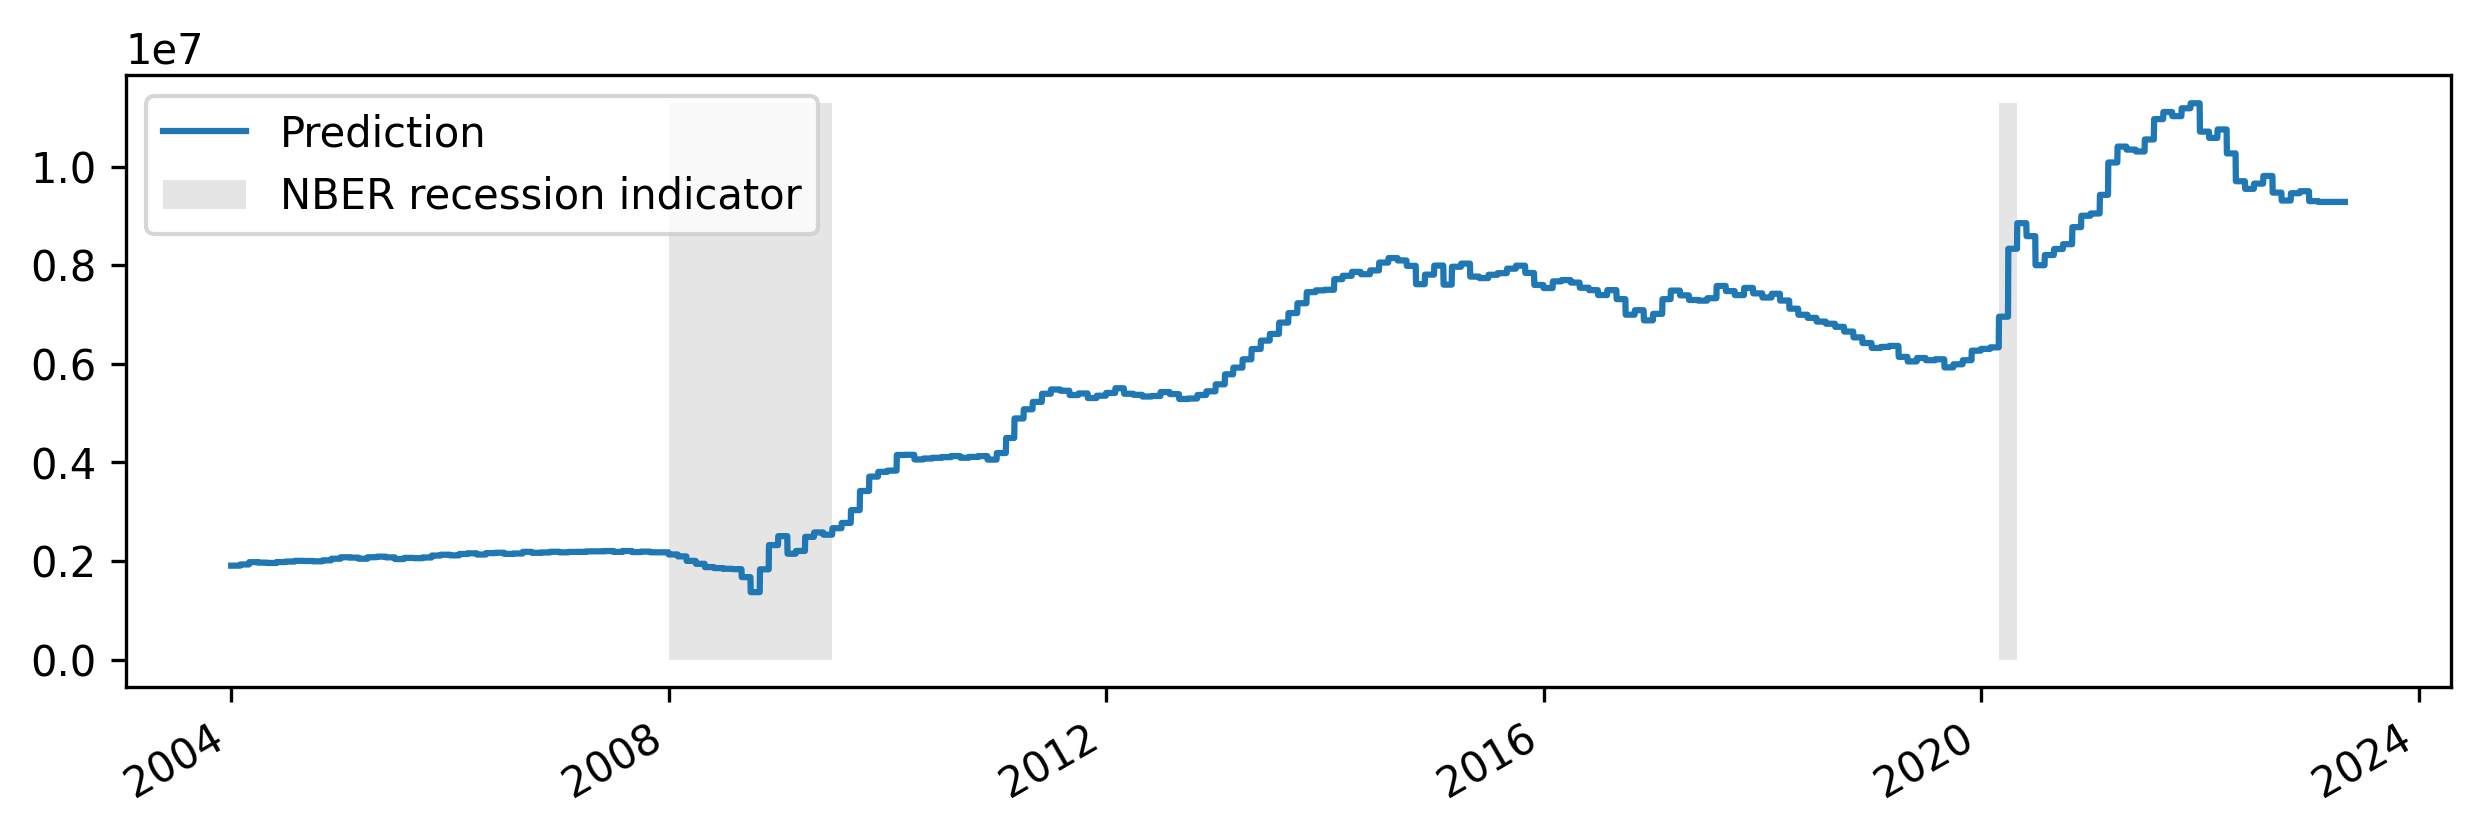

In [41]:
plot(prediction[-6096:],df_for_testing.iloc[:,-2])

